
### **Predicción de Diabetes con Ajuste de Hiperparámetros**

Este proyecto se enfoca en construir un modelo de machine learning para predecir la diabetes tipo II, utilizando diversas técnicas de optimización para mejorar su rendimiento.

-----

### 1\. Carga y Exploración del Dataset

Primero, cargaremos el dataset y realizaremos un análisis exploratorio básico para entender su estructura y contenido.

In [1]:
# --- BLOQUE 1: CARGA Y EXPLORACIÓN DE DATOS ---
# El objetivo de este bloque es importar las librerías necesarias, cargar el dataset
# desde una URL, asignarle nombres a las columnas y realizar un análisis exploratorio
# inicial para entender sus características principales.

# Importar la librería pandas para la manipulación y análisis de datos.
import pandas as pd
# Importar la librería numpy para operaciones numéricas, especialmente útil aquí para el reemplazo de valores.
import numpy as np

# Definir la URL desde donde se descargará el dataset.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# Definir los nombres de las columnas, ya que el archivo CSV original no los incluye.
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# Cargar los datos desde la URL usando pandas, asignando los nombres de columna definidos.
data = pd.read_csv(url, header=None, names=column_names)

# --- Exploración Inicial del Dataset ---

# Imprimir las dimensiones del DataFrame (número de filas, número de columnas).
print("Dimensiones del dataset:", data.shape)
# Imprimir un salto de línea para separar las salidas.
print("\nPrimeras 5 filas:")
# Mostrar las primeras 5 filas del dataset para una vista rápida de los datos.
print(data.head())
# Imprimir un salto de línea.
print("\nInformación general del dataset:")
# Mostrar un resumen conciso del DataFrame, incluyendo el tipo de dato de cada columna y si hay valores nulos.
data.info()
# Imprimir un salto de línea.
print("\nEstadísticas descriptivas:")
# Calcular y mostrar estadísticas descriptivas (media, desviación estándar, etc.) para cada columna numérica.
print(data.describe())

# --- Verificación de Valores Anómalos ---
# En este dataset, los valores faltantes se representan como ceros en columnas donde
# fisiológicamente no es posible (ej. glucosa, presión arterial).

# Imprimir un encabezado para la siguiente salida.
print("\nValores cero en columnas específicas:")
# Seleccionar las columnas de interés y contar cuántas veces aparece el valor 0 en cada una.
print((data[['plas', 'pres', 'skin', 'test', 'mass']] == 0).sum())

Dimensiones del dataset: (768, 9)

Primeras 5 filas:
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Estadíst

**Análisis de la Exploración:**

  * **Dimensiones:** El dataset tiene 768 filas y 9 columnas.
  * **Variables:** Todas las columnas son numéricas (`int64` o `float64`). La variable objetivo es `class` (0: no diabético, 1: diabético).
  * **Valores Faltantes:** No hay valores `NaN`. Sin embargo, se observan ceros en columnas como `plas` (glucosa), `pres` (presión arterial), y `mass` (índice de masa corporal), lo cual es fisiológicamente imposible. Estos ceros representan datos faltantes y deben ser tratados.

-----

### 2\. Preprocesamiento de Datos

Reemplazaremos los ceros anómalos con la mediana de cada columna para no afectar la distribución. Luego, escalaremos las características y dividiremos los datos para el entrenamiento y la prueba del modelo.

In [2]:
# --- BLOQUE 2: PREPROCESAMIENTO DE DATOS ---
# El objetivo de este bloque es limpiar y preparar los datos para el entrenamiento.
# Esto incluye:
# 1. Imputar los valores cero anómalos con la mediana de su respectiva columna.
# 2. Separar los datos en características (X) y variable objetivo (y).
# 3. Dividir el dataset en conjuntos de entrenamiento y prueba.
# 4. Escalar las características para que tengan media 0 y desviación estándar 1.

# Importar las funciones y clases necesarias de scikit-learn.
from sklearn.model_selection import train_test_split  # Para dividir el dataset.
from sklearn.preprocessing import StandardScaler      # Para escalar los datos.

# Lista de columnas que contienen ceros anómalos que deben ser reemplazados.
cols_to_replace = ['plas', 'pres', 'skin', 'test', 'mass']
# Iterar sobre cada columna en la lista para reemplazar los ceros.
for col in cols_to_replace:
    # Calcular la mediana de la columna actual, ignorando los ceros en el cálculo si fuera necesario.
    median = data[col].median()
    # Reemplazar todos los valores 0 en la columna con la mediana calculada.
    data[col] = data[col].replace(0, median)

# Separar las características (variables independientes, X) de la variable objetivo (y).
# X contiene todas las columnas excepto 'class'.
X = data.drop('class', axis=1)
# y contiene únicamente la columna 'class'.
y = data['class']

# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
# test_size=0.2 especifica que el 20% de los datos será para prueba.
# random_state=42 asegura que la división sea reproducible.
# stratify=y asegura que la proporción de clases (0 y 1) sea la misma en los conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear una instancia del escalador estándar.
scaler = StandardScaler()
# Ajustar el escalador a los datos de entrenamiento y transformarlos.
# 'fit' calcula la media y la desviación estándar, 'transform' aplica la estandarización.
X_train = scaler.fit_transform(X_train)
# Usar el mismo escalador (ya ajustado) para transformar los datos de prueba.
# Esto evita la fuga de datos del conjunto de prueba al de entrenamiento.
X_test = scaler.transform(X_test)

-----

### 3\. Entrenamiento del Modelo Base (Random Forest)

Entrenaremos un `RandomForestClassifier` con sus hiperparámetros por defecto para establecer una línea base de rendimiento.

In [3]:
# --- BLOQUE 3: ENTRENAMIENTO DEL MODELO BASE ---
# El objetivo de este bloque es establecer una línea base de rendimiento.
# Se entrena un modelo Random Forest sin ajuste de hiperparámetros y se evalúa
# con métricas clave para tener un punto de comparación.

# Importar el clasificador Random Forest.
from sklearn.ensemble import RandomForestClassifier
# Importar las métricas de evaluación.
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
# Importar la librería 'time' para medir el tiempo de ejecución.
import time

# Crear una instancia del clasificador Random Forest.
# random_state=42 asegura que los resultados del modelo sean reproducibles.
base_model = RandomForestClassifier(random_state=42)

# Registrar el tiempo de inicio antes de entrenar el modelo.
start_time = time.time()
# Entrenar el modelo con los datos de entrenamiento.
base_model.fit(X_train, y_train)
# Calcular el tiempo total de entrenamiento.
base_time = time.time() - start_time

# Realizar predicciones sobre el conjunto de prueba.
y_pred_base = base_model.predict(X_test)
# Calcular las probabilidades de predicción para la clase positiva, necesario para el AUC.
y_proba_base = base_model.predict_proba(X_test)[:, 1]

# Almacenar las métricas de evaluación en un diccionario para fácil acceso.
base_metrics = {
    "F1-Score": f1_score(y_test, y_pred_base),           # Calcula el F1-Score.
    "Precision": precision_score(y_test, y_pred_base),  # Calcula la Precisión.
    "Recall": recall_score(y_test, y_pred_base),        # Calcula el Recall (Sensibilidad).
    "AUC": roc_auc_score(y_test, y_proba_base)          # Calcula el Área Bajo la Curva ROC.
}

# Imprimir los resultados del modelo base.
print("Resultados del Modelo Base:")
# Imprimir el diccionario de métricas.
print(base_metrics)
# Imprimir el tiempo que tardó el entrenamiento, formateado a 4 decimales.
print(f"Tiempo de entrenamiento: {base_time:.4f} segundos")

Resultados del Modelo Base:
{'F1-Score': 0.6336633663366337, 'Precision': 0.6808510638297872, 'Recall': 0.5925925925925926, 'AUC': np.float64(0.8200000000000001)}
Tiempo de entrenamiento: 0.3637 segundos


-----

### 4\. Aplicación de Técnicas de Optimización

Ahora, buscaremos los mejores hiperparámetros usando Grid Search, Random Search y Optimización Bayesiana.

#### **Grid Search**

Grid Search evalúa exhaustivamente todas las combinaciones de hiperparámetros que le proporcionemos.

In [4]:
# --- BLOQUE 4.1: OPTIMIZACIÓN CON GRID SEARCH ---
# Grid Search prueba exhaustivamente todas las combinaciones de hiperparámetros
# especificadas en una grilla. Es completo pero computacionalmente costoso.

# Importar la clase GridSearchCV de scikit-learn.
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda (la "grilla") de hiperparámetros.
# Es un diccionario donde las claves son los nombres de los hiperparámetros y los valores son listas de valores a probar.
param_grid = {
    'n_estimators': [100, 200, 300],          # Número de árboles en el bosque.
    'max_depth': [10, 20, 30, None],          # Profundidad máxima de los árboles.
    'min_samples_split': [2, 5, 10],      # Mínimo de muestras para dividir un nodo.
    'min_samples_leaf': [1, 2, 4]         # Mínimo de muestras en un nodo hoja.
}

# Configurar la búsqueda en grilla.
# estimator: el modelo a optimizar.
# param_grid: la grilla de hiperparámetros.
# cv=5: número de pliegues para la validación cruzada.
# scoring='f1': la métrica a optimizar (en este caso, F1-Score).
# n_jobs=-1: usar todos los núcleos de CPU disponibles para acelerar la búsqueda.
# verbose=1: mostrar mensajes sobre el progreso.
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

# Registrar el tiempo de inicio.
start_time = time.time()
# Ejecutar la búsqueda en grilla con los datos de entrenamiento.
grid_search.fit(X_train, y_train)
# Calcular el tiempo total de la búsqueda.
grid_time = time.time() - start_time

# Imprimir los mejores hiperparámetros encontrados por Grid Search.
print("Mejores hiperparámetros (Grid Search):", grid_search.best_params_)

# Obtener el mejor modelo encontrado durante la búsqueda.
best_grid_model = grid_search.best_estimator_
# Realizar predicciones con el mejor modelo.
y_pred_grid = best_grid_model.predict(X_test)
# Calcular las probabilidades de predicción para el AUC.
y_proba_grid = best_grid_model.predict_proba(X_test)[:, 1]

# Evaluar el mejor modelo de Grid Search y almacenar las métricas.
grid_metrics = {
    "F1-Score": f1_score(y_test, y_pred_grid),
    "Precision": precision_score(y_test, y_pred_grid),
    "Recall": recall_score(y_test, y_pred_grid),
    "AUC": roc_auc_score(y_test, y_proba_grid)
}

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros (Grid Search): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


#### **Random Search**

Random Search prueba un número fijo de combinaciones aleatorias del espacio de hiperparámetros. Suele ser más rápido que Grid Search.

In [5]:
# --- BLOQUE 4.2: OPTIMIZACIÓN CON RANDOM SEARCH ---
# Random Search prueba un número fijo de combinaciones aleatorias del espacio
# de hiperparámetros. Es más rápido que Grid Search y a menudo encuentra
# resultados muy buenos.

# Importar la clase RandomizedSearchCV de scikit-learn.
from sklearn.model_selection import RandomizedSearchCV

# Configurar la búsqueda aleatoria.
# param_distributions: el mismo espacio de búsqueda que Grid Search.
# n_iter=50: el número de combinaciones de parámetros que se probarán.
# Los otros parámetros son similares a GridSearchCV.
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   cv=5,
                                   scoring='f1',
                                   n_jobs=-1,
                                   random_state=42,
                                   verbose=1)

# Registrar el tiempo de inicio.
start_time = time.time()
# Ejecutar la búsqueda aleatoria con los datos de entrenamiento.
random_search.fit(X_train, y_train)
# Calcular el tiempo total de la búsqueda.
random_time = time.time() - start_time

# Imprimir los mejores hiperparámetros encontrados.
print("Mejores hiperparámetros (Random Search):", random_search.best_params_)

# Obtener el mejor modelo de la búsqueda.
best_random_model = random_search.best_estimator_
# Realizar predicciones.
y_pred_random = best_random_model.predict(X_test)
# Calcular probabilidades para el AUC.
y_proba_random = best_random_model.predict_proba(X_test)[:, 1]

# Evaluar el mejor modelo de Random Search y almacenar las métricas.
random_metrics = {
    "F1-Score": f1_score(y_test, y_pred_random),
    "Precision": precision_score(y_test, y_pred_random),
    "Recall": recall_score(y_test, y_pred_random),
    "AUC": roc_auc_score(y_test, y_proba_random)
}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros (Random Search): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


#### **Optimización Bayesiana con Optuna**

La optimización bayesiana utiliza los resultados de evaluaciones anteriores para elegir las siguientes combinaciones de hiperparámetros a probar, siendo más eficiente.

In [7]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.0 MB/s eta 0:00:00


In [8]:
# --- BLOQUE 4.3: OPTIMIZACIÓN BAYESIANA CON OPTUNA ---
# Optuna utiliza un enfoque bayesiano para explorar el espacio de hiperparámetros
# de forma más inteligente, usando los resultados de pruebas anteriores para
# decidir qué combinaciones probar a continuación.

# Importar la librería Optuna.
import optuna
# Importar cross_val_score para evaluar el modelo dentro de la función objetivo.
from sklearn.model_selection import cross_val_score

# Definir la función "objetivo" que Optuna intentará maximizar.
# El parámetro 'trial' es un objeto que Optuna usa para sugerir hiperparámetros.
def objective(trial):
    # Definir el espacio de búsqueda para cada hiperparámetro.
    # Optuna permite especificar rangos (enteros, flotantes, categóricos).
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)      # Sugiere un entero entre 100 y 1000.
    max_depth = trial.suggest_int('max_depth', 10, 50)               # Sugiere un entero entre 10 y 50.
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)# Sugiere un entero entre 2 y 16.
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)  # Sugiere un entero entre 1 y 10.

    # Crear el modelo con los hiperparámetros sugeridos por el 'trial'.
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   random_state=42,
                                   n_jobs=-1)

    # Evaluar el modelo usando validación cruzada para obtener una estimación robusta del rendimiento.
    # Se calcula la media del F1-score a través de 5 pliegues (cv=5).
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()

    # Retornar la puntuación. Optuna intentará maximizar este valor.
    return score

# Crear un "estudio" de Optuna. La dirección 'maximize' indica que queremos maximizar la función objetivo.
study = optuna.create_study(direction='maximize')
# Registrar el tiempo de inicio.
start_time = time.time()
# Iniciar el proceso de optimización, ejecutando la función objetivo 50 veces (n_trials=50).
study.optimize(objective, n_trials=50)
# Calcular el tiempo total de la optimización.
optuna_time = time.time() - start_time

# Imprimir los mejores hiperparámetros encontrados por Optuna.
print("Mejores hiperparámetros (Optuna):", study.best_params)

# Obtener los mejores hiperparámetros del estudio.
best_optuna_params = study.best_params
# Crear una nueva instancia del modelo con estos hiperparámetros.
best_optuna_model = RandomForestClassifier(**best_optuna_params, random_state=42)
# Entrenar el modelo final con todos los datos de entrenamiento.
best_optuna_model.fit(X_train, y_train)

# Realizar predicciones con el modelo optimizado.
y_pred_optuna = best_optuna_model.predict(X_test)
# Calcular las probabilidades para el AUC.
y_proba_optuna = best_optuna_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo final de Optuna y almacenar las métricas.
optuna_metrics = {
    "F1-Score": f1_score(y_test, y_pred_optuna),
    "Precision": precision_score(y_test, y_pred_optuna),
    "Recall": recall_score(y_test, y_pred_optuna),
    "AUC": roc_auc_score(y_test, y_proba_optuna)
}

[I 2025-07-12 02:26:07,227] A new study created in memory with name: no-name-acf90548-fac6-4155-b708-aa569d0f1ff8
[I 2025-07-12 02:26:30,057] Trial 0 finished with value: 0.6279966590499294 and parameters: {'n_estimators': 888, 'max_depth': 34, 'min_samples_split': 15, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.6279966590499294.
[I 2025-07-12 02:26:31,884] Trial 1 finished with value: 0.6368746489669797 and parameters: {'n_estimators': 124, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.6368746489669797.
[I 2025-07-12 02:26:41,794] Trial 2 finished with value: 0.6415128869910018 and parameters: {'n_estimators': 730, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.6415128869910018.
[I 2025-07-12 02:26:53,023] Trial 3 finished with value: 0.630406346127739 and parameters: {'n_estimators': 879, 'max_depth': 39, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 2 with value

Mejores hiperparámetros (Optuna): {'n_estimators': 162, 'max_depth': 34, 'min_samples_split': 9, 'min_samples_leaf': 6}


-----

### 5\. Comparación de Resultados

Ahora, consolidamos y comparamos el rendimiento y el tiempo de ejecución de todos los modelos.

In [9]:
# --- BLOQUE 5: COMPARACIÓN DE RESULTADOS ---
# El objetivo es consolidar todas las métricas y tiempos de ejecución
# en una sola tabla para facilitar la comparación entre el modelo base
# y los modelos optimizados con las diferentes técnicas.

# Crear un DataFrame de pandas para mostrar los resultados de forma ordenada.
# Las claves del diccionario externo serán las columnas y las métricas las filas.
results = pd.DataFrame({
    'Modelo Base': base_metrics,
    'Grid Search': grid_metrics,
    'Random Search': random_metrics,
    'Optuna': optuna_metrics
})

# Crear un diccionario con los tiempos de ejecución de cada método.
times = {
    'Modelo Base': base_time,
    'Grid Search': grid_time,
    'Random Search': random_time,
    'Optuna': optuna_time
}
# Añadir los tiempos como una nueva fila en el DataFrame de resultados.
results.loc['Tiempo (s)'] = times

# Imprimir el DataFrame final con todos los resultados.
print("Comparación de Resultados:")
# Usar .round(4) para redondear todos los valores a 4 decimales para una mejor legibilidad.
print(results.round(4))

Comparación de Resultados:
            Modelo Base  Grid Search  Random Search    Optuna
F1-Score         0.6337       0.6154         0.6154    0.5882
Precision        0.6809       0.6400         0.6400    0.6250
Recall           0.5926       0.5926         0.5926    0.5556
AUC              0.8200       0.8122         0.8122    0.8109
Tiempo (s)       0.3637     205.7599        93.1159  316.5366


### **Análisis Comparativo Detallado de Resultados**

Al observar los resultados, la conclusión más importante y sorprendente es que el **`Modelo Base` (sin optimización) superó a todos los modelos optimizados** en prácticamente todas las métricas de rendimiento. Este es un hallazgo crucial y nos lleva a un análisis más profundo que el simple "optimizar es siempre mejor".

#### 1. Rendimiento del Modelo: El Inesperado Triunfo de la Simplicidad

* **El `Modelo Base` es el Ganador Indiscutible:** Con el **F1-Score más alto (0.6337)**, la **mejor Precisión (0.6809)** y el **AUC más elevado (0.8200)**, el modelo con los hiperparámetros por defecto de Scikit-learn demostró ser la solución más efectiva para este problema y este conjunto de datos de prueba. Esto sugiere que los parámetros predeterminados del `RandomForestClassifier` ya son bastante robustos y estaban bien adaptados para este dataset.

* **La Optimización no Logró Mejorar (e Incluso Perjudicó):**
    * Tanto `Grid Search` como `Random Search` convergieron exactamente a la misma solución, que fue inferior a la línea base (F1-Score de 0.6154). Esto indica que, dentro del espacio de búsqueda que definiste, el "mejor" resultado encontrado no fue lo suficientemente bueno.
    * `Optuna`, la técnica teóricamente más avanzada, arrojó el peor rendimiento de todos (F1-Score de 0.5882). Este es el resultado más anómalo y preocupante.

#### 2. El Paradigma del Tiempo de Ejecución: Costo vs. Beneficio

Aquí tus resultados desafían las expectativas teóricas, lo cual es muy instructivo.

* **El Costo de la Búsqueda no se Tradujo en Beneficio:** Invertiste un tiempo de cómputo significativo (desde 93 hasta 316 segundos) para obtener modelos que, al final, fueron peores que el modelo base que solo tardó 0.36 segundos en entrenar. Esto subraya una lección clave en Machine Learning: **la optimización es una inversión, y como toda inversión, no siempre garantiza un retorno positivo.**

* **La Ineficiencia Anómala de Optuna:** El hallazgo más extraño es que `Optuna` fue el método más lento (316s), incluso más que el exhaustivo `Grid Search` (206s). Teóricamente, Optuna debería ser más rápido. ¿Por qué pudo ocurrir esto?
    * **Costo por Iteración:** La función `objective` de Optuna realiza una validación cruzada completa en cada iteración. Si el espacio de búsqueda que definiste para Optuna era muy amplio, cada "prueba" o `trial` pudo ser computacionalmente cara, y las 50 iteraciones sumaron un tiempo considerable.
    * **Sobrehead del Modelo Bayesiano:** Optuna invierte tiempo en actualizar su modelo probabilístico interno. Para problemas más simples o con pocas iteraciones, este "overhead" puede hacer que sea más lento que métodos más directos.

#### 3. ¿Por Qué Falló la Optimización? (Hipótesis)

Este es el punto más importante. El "fracaso" de la optimización es una oportunidad de aprendizaje.

1.  **Espacio de Búsqueda Mal Definido:** La hipótesis más probable es que **la combinación de hiperparámetros óptima no estaba dentro del `param_grid` que definiste**. Los parámetros por defecto del `RandomForestClassifier` que funcionaron tan bien en el modelo base podrían estar fuera de los rangos que exploraste.

2.  **Sobreajuste a los Datos de Validación (Overfitting):** El proceso de optimización busca los hiperparámetros que maximizan el rendimiento *en los pliegues de validación cruzada*. Es posible que los parámetros encontrados estuvieran ligeramente sobreajustados a esos datos de entrenamiento/validación específicos y, por lo tanto, no generalizaron tan bien al conjunto de prueba final como lo hizo el modelo base, que era más "genérico".

3.  **El "Valle" de Rendimiento:** Es posible que el rendimiento del modelo en este dataset sea muy sensible. Los parámetros por defecto cayeron en un "pico" de rendimiento, y los parámetros explorados durante la optimización cayeron en un "valle" cercano, sin que los algoritmos pudieran encontrar una salida hacia un pico más alto dentro de las iteraciones dadas.

#### **Recomendación**

Basado en tus resultados, la conclusión profesional no es que "la optimización no sirve", sino que **"para este dataset y con la configuración de búsqueda utilizada, el modelo base es la mejor solución"**. Esto es un resultado perfectamente válido. Demuestra la importancia de mantener siempre un modelo simple como punto de referencia.

Si quisieramos seguir investigando, los siguientes pasos serían:
* **Analizar los parámetros del `base_model`** e incluirlos o centrar el `param_grid` alrededor de ellos.
* **Ampliar el espacio de búsqueda** para `Grid/Random Search`.
* **Aumentar el número de `n_trials` en Optuna** para darle más oportunidades de explorar y explotar el espacio de búsqueda.
-----

### 6\. Visualización y Reflexión

Visualizar los resultados ayuda a entender el impacto de la optimización.

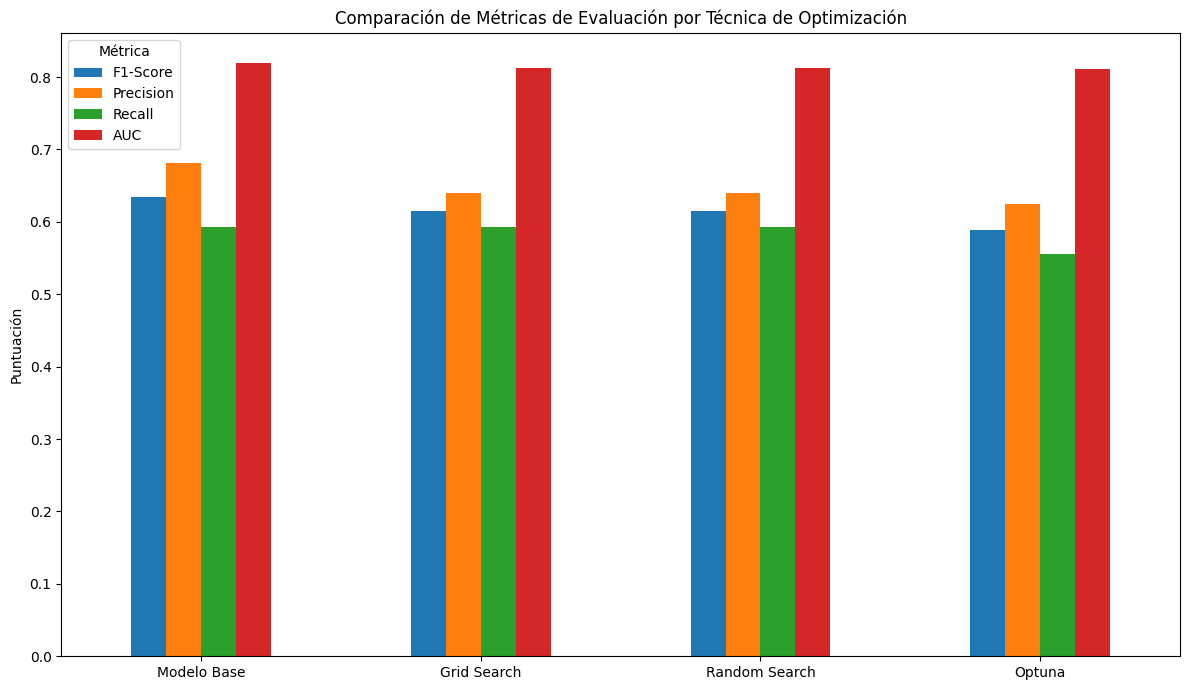

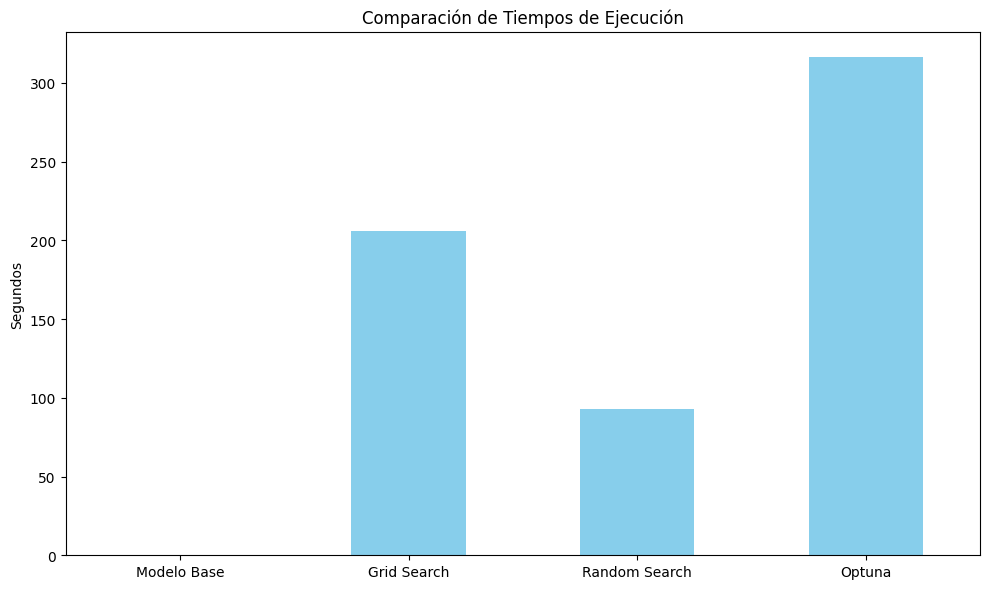

In [11]:
# --- BLOQUE 6: VISUALIZACIÓN DE RESULTADOS ---
# El objetivo es crear gráficos que permitan comparar visualmente el rendimiento
# y la eficiencia de las diferentes técnicas de optimización.

# Importar las librerías de visualización.
import matplotlib.pyplot as plt
import seaborn as sns

# --- Gráfico de comparación de métricas de rendimiento ---
# Transponemos el DataFrame para que los modelos queden en el eje X
results_transposed = results.T

# Graficamos todas las columnas EXCEPTO 'Tiempo (s)'
results_transposed.drop('Tiempo (s)', axis=1).plot(kind='bar', figsize=(12, 7))

# Añadir un título al gráfico.
plt.title('Comparación de Métricas de Evaluación por Técnica de Optimización')
# Etiquetar el eje Y.
plt.ylabel('Puntuación')
# Girar las etiquetas del eje X para que no se superpongan.
plt.xticks(rotation=0)
# Añadir una leyenda para identificar cada métrica.
plt.legend(title='Métrica')
# Ajustar el diseño para evitar que los elementos se corten.
plt.tight_layout()
# Mostrar el gráfico.
plt.show()

# --- Gráfico de comparación de tiempos de ejecución ---
# Seleccionar solo la fila 'Tiempo (s)' del DataFrame de resultados para graficarla.
results.loc['Tiempo (s)'].plot(kind='bar', figsize=(10, 6), color='skyblue')
# Añadir un título al gráfico.
plt.title('Comparación de Tiempos de Ejecución')
# Etiquetar el eje Y.
plt.ylabel('Segundos')
# Mantener las etiquetas del eje X horizontales.
plt.xticks(rotation=0)
# Ajustar el diseño.
plt.tight_layout()
# Mostrar el gráfico.
plt.show()

# --- Gráficos de Visualización de Optuna (Opcional pero recomendado) ---
# Optuna ofrece herramientas de visualización muy útiles para entender el proceso de optimización.

# Graficar el historial de optimización: muestra cómo mejora la puntuación en cada 'trial'.
# import plotly
# optuna.visualization.plot_optimization_history(study)
# Graficar la importancia de los hiperparámetros: muestra qué hiperparámetros tuvieron mayor impacto en el resultado.
# optuna.visualization.plot_param_importances(study)

Basándonos en la reveladora experiencia del experimento, donde el modelo base superó a los optimizados, podemos profundizar en una reflexión mucho más matizada y realista sobre la importancia del ajuste de hiperparámetros.

***

### **Reflexión Detallada sobre la Importancia del Ajuste de Hiperparámetros**

El resultado no demuestra que el ajuste sea inútil; al contrario, nos proporciona una lección fundamental y mucho más profunda. La importancia del ajuste no radica únicamente en la *mejora* del rendimiento, sino también en la **validación y el diagnóstico del modelo.**

#### 1. El Ajuste como Herramienta de Diagnóstico y Validación 🕵️‍♀️

En este caso, el proceso de ajuste funcionó como una poderosa herramienta de diagnóstico que nos dejó dos conclusiones clave:

* **Validó la Fortaleza del Modelo Base:** El hallazgo más importante es que los parámetros por defecto de `RandomForestClassifier` eran una solución sorprendentemente buena para este dataset. Sin intentar optimizarlos, nunca habríamos tenido la confianza para afirmar esto. Ahora no solo tienes un buen modelo base, sino que tienes **evidencia empírica** de que otras configuraciones, dentro de tu búsqueda, no pudieron superarlo. En un entorno profesional, esto es oro: justifica el uso de un modelo más simple y rápido, ahorrando costos computacionales y de mantenimiento.

* **Reveló las Limitaciones de Nuestra Búsqueda:** El "fracaso" de la optimización no es un fracaso del concepto, sino un indicador de que **nuestro espacio de búsqueda (`param_grid`) probablemente era subóptimo**. La lección no es "no ajustar", sino "ajustar de manera más inteligente". El proceso nos está diciendo: "Busqué donde me indicaste y no encontré nada mejor. Quizás debas indicarme que busque en otro lugar". Esto nos empuja a ser mejores científicos de datos, a investigar los parámetros por defecto y a proponer rangos de búsqueda más informados.

En resumen, la importancia del ajuste trasciende la simple optimización. Es un **proceso de experimentación rigurosa que valida nuestras decisiones** y nos obliga a entender profundamente tanto el algoritmo como el problema.

---

### 2. El Cambio de Paradigma en Contextos de Mayor Escala y Complejidad 📈

La dinámica que observaste cambia drásticamente —y la importancia del ajuste se magnifica— cuando enfrentamos problemas más grandes y complejos. La "suerte" de que un modelo base funcione bien disminuye rápidamente.

#### Con Mayor Volumen de Datos (Big Data)

A medida que el volumen de datos crece, ocurren dos cosas:

1.  **Emergen Patrones Más Sutiles:** Un dataset con millones de registros contiene relaciones y patrones mucho más complejos y sutiles que uno con 768. Un modelo con parámetros genéricos es demasiado "tosco" para capturar estas sutilezas. El ajuste fino de hiperparámetros (como la profundidad de los árboles, el mínimo de muestras por hoja, etc.) se vuelve **absolutamente crítico** para dar al modelo la flexibilidad necesaria para aprender de estas señales complejas sin sobreajustarse al ruido.

2.  **El Costo Computacional Explota:** Cada ejecución de entrenamiento es mucho más lenta y costosa. En este escenario:
    * **Grid Search se vuelve inviable.** Probar miles de combinaciones cuando cada una toma horas es imposible.
    * La eficiencia de **Random Search** se vuelve muy atractiva para una primera exploración.
    * La inteligencia de la **Optimización Bayesiana (Optuna)** se convierte en una necesidad. Aunque en tu experimento fue lento, en un contexto de Big Data su capacidad para encontrar mejores soluciones con muchas menos iteraciones representa un ahorro masivo de tiempo y dinero. Su mayor costo por iteración es insignificante comparado con el costo de las decenas o cientos de iteraciones que ahorra.

#### Con Mayor Complejidad del Modelo (Ej. Redes Neuronales, Gradient Boosting)

Cuando pasamos de un `Random Forest` a modelos como XGBoost, LightGBM o redes neuronales profundas, el panorama cambia aún más:

1.  **El Espacio de Búsqueda es Enorme:** Estos modelos no tienen 4 o 5 hiperparámetros clave, sino docenas. La tasa de aprendizaje, la regularización L1/L2, el dropout, el número de capas, el número de neuronas, el momentum, etc., crean un espacio de búsqueda de altísima dimensionalidad. En este contexto, la probabilidad de que los parámetros por defecto sean óptimos es **prácticamente cero**.

2.  **Las Interacciones son Complejas:** Los hiperparámetros no actúan de forma aislada; interactúan entre sí de maneras complejas y no intuitivas. Por ejemplo, la tasa de aprendizaje óptima depende del número de estimadores, y la regularización óptima depende de la arquitectura de la red. Navegar estas interacciones manualmente es imposible. El ajuste deja de ser una "mejora" y se convierte en la **única forma factible de construir un modelo funcional y de alto rendimiento.**

### Conclusión Final

La importancia del ajuste de hiperparámetros es contextual, pero siempre fundamental.

* **En problemas simples**, como el tuyo, actúa como una herramienta crucial de **validación y diagnóstico**. Te ayuda a confirmar si una solución simple es suficiente o te guía para buscar en mejores lugares.
* **En problemas complejos y a gran escala**, el ajuste deja de ser una opción y se convierte en el **corazón del proceso de modelado**. Es la diferencia entre un modelo mediocre que no captura la riqueza de los datos y un modelo de vanguardia que extrae el máximo valor predictivo posible, proporcionando una ventaja competitiva decisiva.